In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

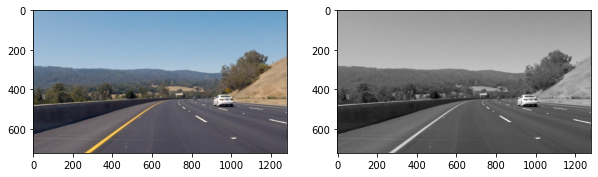

In [2]:
image = cv2.imread(r'CVND_Exercises-master\1_2_Convolutional_Filters_Edge_Detection\images\curved_lane.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
f, (ax1,ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(image)
ax2.imshow(gray_image, cmap='gray')

In [3]:
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])    #vertical kernel
sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])    #horizontal kernel

sobel_x2 = np.array([[-1.5,0,1.5],[-2.5,0,2.5],[-1.5,0,1.5]])    #vertical kernel
sobel_y2 = np.array([[-1.5,-2.5,-1.5],[0,0,0],[1.5,2.5,1.5]])    #horizontal kernel

sobel_y3 = np.array([[-1,-1,0,1,1],
                    [-2,-2,0,2,2],
                    [-3,-3,0,3,3],
                    [-2,-2,0,2,2],
                    [-1,-1,0,1,1]])
sobel_x3 = np.array([[-1,-2,-3,-2,-1],
                    [-1,-2,-3,-2,-1],
                    [0,0,0,0,0],
                    [1,2,3,2,1],
                    [1,2,3,2,1]])

sobel_y4 = np.array([[-1,0,0,0,1],
                    [-2,0,0,0,2],
                    [-3,0,0,0,3],
                    [-2,0,0,0,2],
                    [-1,0,0,0,1]])
sobel_x4 = np.array([[-1,-2,-3,-2,-1],
                    [0,0,0,0,0],
                    [0,0,0,0,0],
                    [0,0,0,0,0],
                    [1,2,3,2,1]])

In [4]:
filtered_image_y = cv2.filter2D(gray_image, -1, sobel_y)
filtered_image_x = cv2.filter2D(gray_image, -1, sobel_x)

Text(0.5, 1.0, 'vertical kernel')

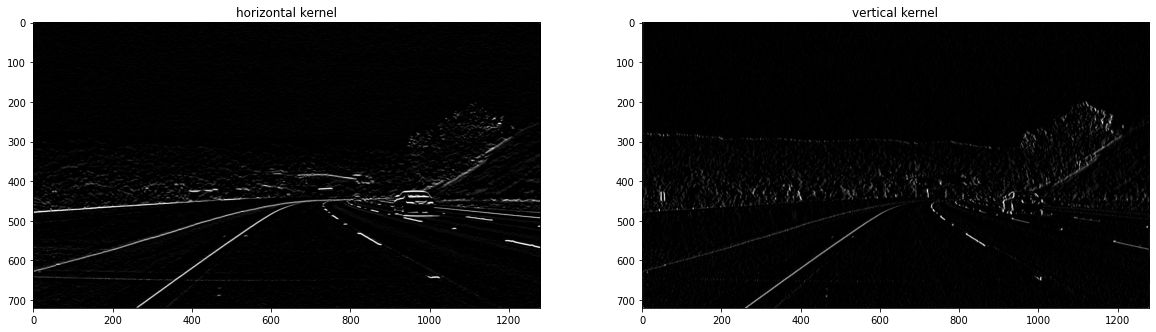

In [5]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.imshow(filtered_image_y, cmap='gray')
ax1.set_title('horizontal kernel')
ax2.imshow(filtered_image_x, cmap='gray')
ax2.set_title('vertical kernel')

In [6]:
def ft_image(norm_image):
    f = np.fft.fft2(norm_image)
    f_shift = np.fft.fftshift(f)
    freq = 20*np.log(np.abs(f_shift))
    return freq

Text(0.5, 1.0, 'original grayscale fourier')

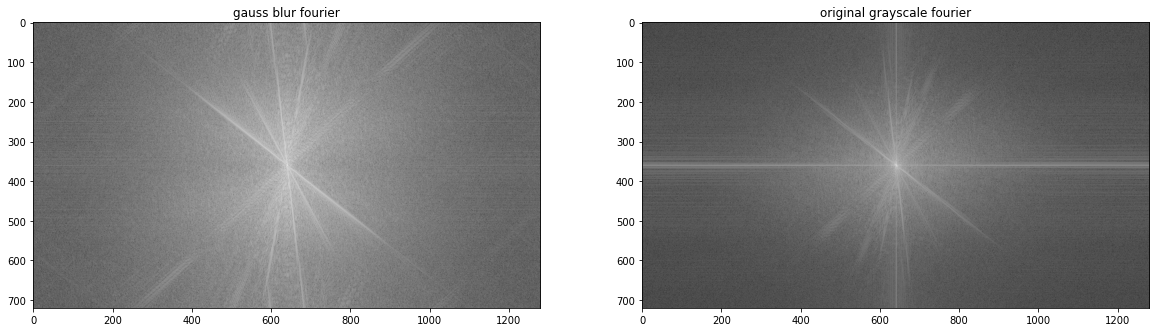

In [8]:
f_blur = ft_image(filtered_image_y)
f_gray = ft_image(gray_image)
f, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.imshow(f_blur, cmap='gray')
ax1.set_title('gauss blur fourier')
ax2.imshow(f_gray, cmap='gray')
ax2.set_title('original grayscale fourier')